# Visualization of Burgers Equation Results

This notebook provides visualization tools for analyzing results from the Burgers equation solver.

## Features

- **Solution Evolution**: Time-dependent plots showing wave steepening
- **Shock Wave Analysis**: Multi-panel analysis of discontinuities
- **Gradient Detection**: Identify shock formation through gradient analysis
- **Comparison Tools**: Compare sequential vs parallel results

## Data Sources

Load result files (`.npz` format) from:
- **Sequential solver**: `results/` directory (from `1_sequential_rusanov.ipynb`)
- **Parallel solver**: `plgrid_results/` directory (from PLGrid runs)

## Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Configuration

In [ ]:
# Directories
SEQUENTIAL_DIR = Path("results")
PARALLEL_DIR = Path("plgrid_results")
PLOTS_DIR = Path("plots")
PLOTS_DIR.mkdir(exist_ok=True)

# Select grid size to visualize
# TODO: use all the grid sizes for visualization for more data
VISUALIZATION_SIZE = 1200  # Options: 1200, 2400, 4800

print(f"Configuration:")
print(f"  Sequential results: {SEQUENTIAL_DIR}")
print(f"  Parallel results: {PARALLEL_DIR}")
print(f"  Plots directory: {PLOTS_DIR}")
print(f"  Visualization grid size: {VISUALIZATION_SIZE}")

## Load Sequential Results

Load simulation results from sequential solver. The file contains:
- `x`: Spatial grid points
- `snapshots`: Solution at different time steps
- `times`: Corresponding time values
- `u_final`: Final solution state
- Simulation parameters: `nx`, `nu`, `t_final`, etc.

In [3]:
# Load sequential solution
seq_file = SEQUENTIAL_DIR / f"results_sequential_nx{VISUALIZATION_SIZE}.npz"

if seq_file.exists():
    data = np.load(seq_file)
    x = data['x']
    snapshots = data['snapshots']
    times = data['times']
    u_final = data['u_final']
    
    print(f"Loaded sequential results from: {seq_file}")
    print(f"  Grid points: {len(x)}")
    print(f"  Number of snapshots: {len(snapshots)}")
    print(f"  Time range: [{times[0]:.6f}, {times[-1]:.6f}]")
    print(f"  Solution range: [{u_final.min():.6f}, {u_final.max():.6f}]")
else:
    print(f"ERROR: Sequential result file not found: {seq_file}")
    print("Please run 1_sequential_rusanov.ipynb first to generate results.")

Loaded sequential results from: results/results_sequential_nx300.npz
  Grid points: 300
  Number of snapshots: 11
  Time range: [0.000000, 0.500000]
  Solution range: [0.432852, 0.567077]


## Plot 1: Solution Evolution

Visualize how the solution evolves over time. The colormap progression shows temporal development:
- **Blue/Purple**: Early times
- **Green/Yellow**: Middle times  
- **Yellow**: Late times

Look for:
- Wave steepening (solution becoming vertical)
- Shock formation (discontinuities)
- Diffusive smoothing (viscosity effects)

Saved: plots/solution_evolution_nx300.png


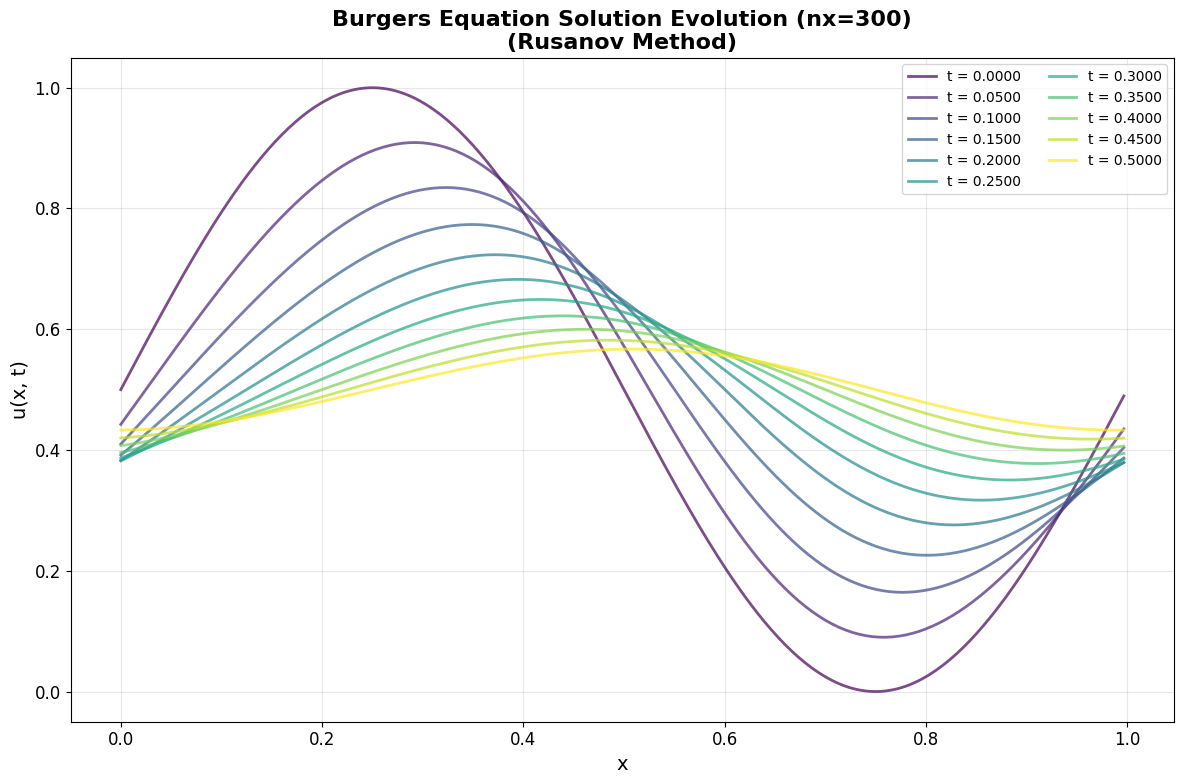

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

# Use colormap for time progression
colors = plt.cm.viridis(np.linspace(0, 1, len(snapshots)))

for i, (snapshot, t) in enumerate(zip(snapshots, times)):
    ax.plot(x, snapshot, color=colors[i], linewidth=2,
           label=f't = {t:.4f}', alpha=0.7)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('u(x, t)', fontsize=14)
ax.set_title(f'Burgers Equation Solution Evolution (nx={VISUALIZATION_SIZE})\n(Rusanov Method)', 
            fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=10, ncol=2)

plt.tight_layout()
output_file = PLOTS_DIR / f'solution_evolution_nx{VISUALIZATION_SIZE}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Saved: {output_file}")
plt.show()

## Plot 2: Shock Wave Analysis

Comprehensive analysis showing:

### Panel 1 (Top): Solution Evolution
All snapshots overlaid to see time progression

### Panel 2 (Middle Left): Initial vs Final
Direct comparison showing total change

### Panel 3 (Middle Right): Gradient Magnitude
$\left|\frac{du}{dx}\right|$ - indicates shock strength

Large gradients indicate sharp discontinuities (shocks)

### Panel 4 (Bottom Left): Space-Time Heatmap
2D visualization showing solution evolution in $(x,t)$ space

### Panel 5 (Bottom Right): Shock Strength Evolution  
Maximum gradient over time - shows shock development

Saved: plots/shock_wave_analysis_nx300.png


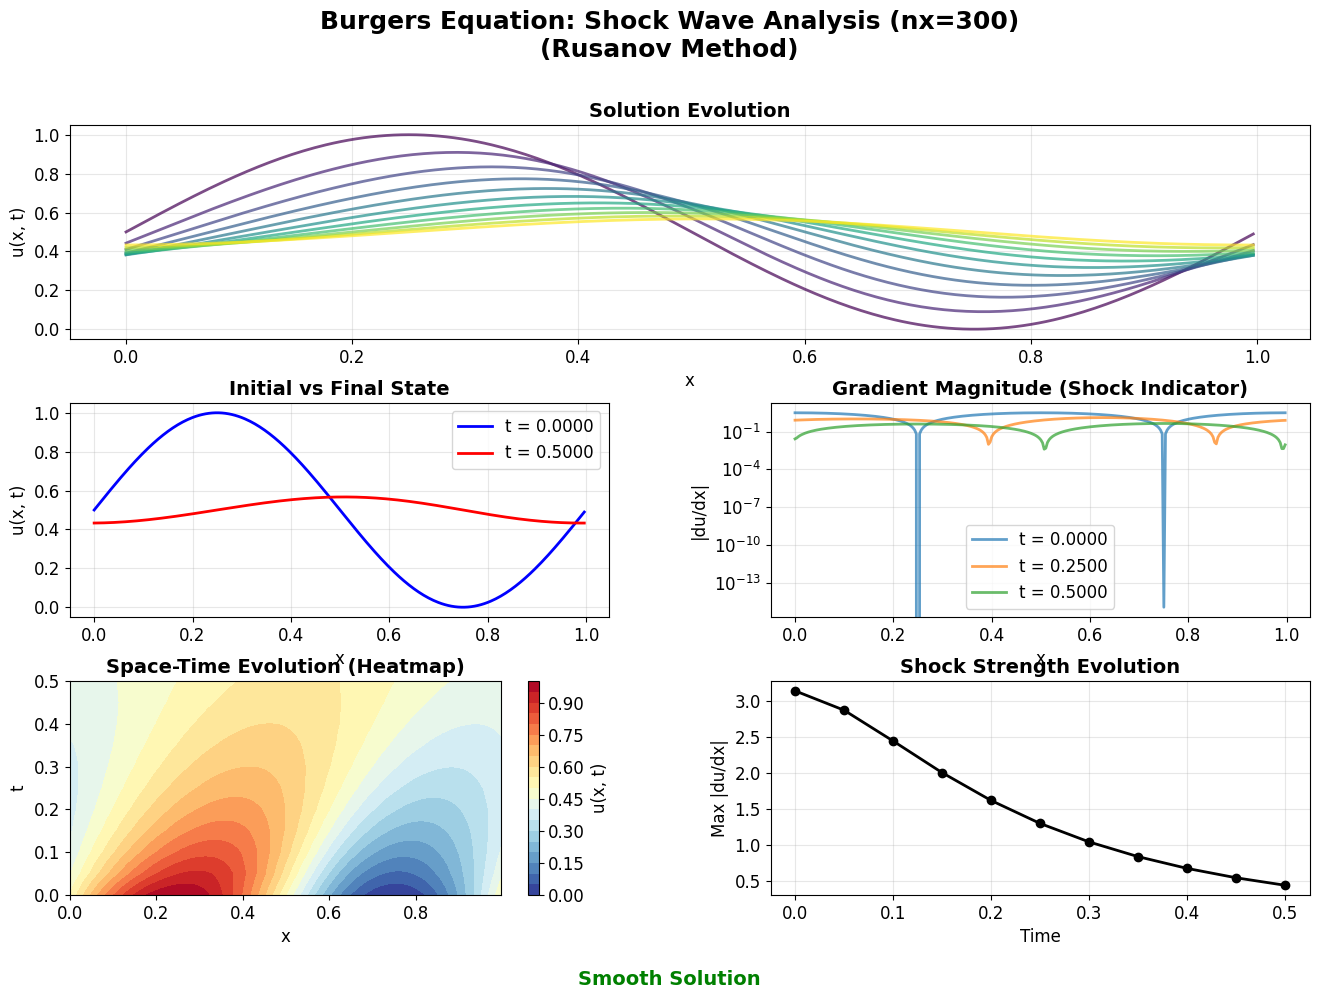

In [5]:
n_snapshots = len(snapshots)

# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Solution evolution (top)
ax1 = fig.add_subplot(gs[0, :])
colors = plt.cm.viridis(np.linspace(0, 1, n_snapshots))
for i, (snapshot, t) in enumerate(zip(snapshots, times)):
    ax1.plot(x, snapshot, color=colors[i], linewidth=2, alpha=0.7)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('u(x, t)', fontsize=12)
ax1.set_title('Solution Evolution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Initial vs Final comparison
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(x, snapshots[0], 'b-', linewidth=2, label=f't = {times[0]:.4f}')
ax2.plot(x, snapshots[-1], 'r-', linewidth=2, label=f't = {times[-1]:.4f}')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('u(x, t)', fontsize=12)
ax2.set_title('Initial vs Final State', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Gradient analysis for shock detection
ax3 = fig.add_subplot(gs[1, 1])
for i in [0, n_snapshots//2, n_snapshots-1]:
    gradient = np.gradient(snapshots[i], x)
    ax3.plot(x, np.abs(gradient), linewidth=2,
            label=f't = {times[i]:.4f}', alpha=0.7)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('|du/dx|', fontsize=12)
ax3.set_title('Gradient Magnitude (Shock Indicator)', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# 4. Heatmap of solution evolution
ax4 = fig.add_subplot(gs[2, 0])
T, X = np.meshgrid(times, x)
contour = ax4.contourf(X, T, snapshots.T, levels=20, cmap='RdYlBu_r')
plt.colorbar(contour, ax=ax4, label='u(x, t)')
ax4.set_xlabel('x', fontsize=12)
ax4.set_ylabel('t', fontsize=12)
ax4.set_title('Space-Time Evolution (Heatmap)', fontsize=14, fontweight='bold')

# 5. Maximum gradient over time (shock strength evolution)
ax5 = fig.add_subplot(gs[2, 1])
max_gradients = []
for snapshot in snapshots:
    gradient = np.abs(np.gradient(snapshot, x))
    max_gradients.append(np.max(gradient))
ax5.plot(times, max_gradients, 'ko-', linewidth=2, markersize=6)
ax5.set_xlabel('Time', fontsize=12)
ax5.set_ylabel('Max |du/dx|', fontsize=12)
ax5.set_title('Shock Strength Evolution', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

# Add shock detection annotation
final_max_gradient = max_gradients[-1]
if final_max_gradient > 10.0:
    shock_text = "Strong Shock Waves Detected!"
    color = 'red'
elif final_max_gradient > 2.0:
    shock_text = "Moderate Discontinuities"
    color = 'orange'
else:
    shock_text = "Smooth Solution"
    color = 'green'

fig.text(0.5, 0.02, shock_text, ha='center', fontsize=14,
        fontweight='bold', color=color)

plt.suptitle(f'Burgers Equation: Shock Wave Analysis (nx={VISUALIZATION_SIZE})\n(Rusanov Method)',
            fontsize=18, fontweight='bold', y=0.995)

output_file = PLOTS_DIR / f'shock_wave_analysis_nx{VISUALIZATION_SIZE}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Saved: {output_file}")
plt.show()

## Shock Detection Summary

Analyze the gradient to quantify shock strength:

**Classification:**
- Strong shocks: $\max|du/dx| > 10.0$
- Moderate discontinuities: $\max|du/dx| > 2.0$
- Smooth solution: $\max|du/dx| < 2.0$

In [6]:
# Check for shock formation
gradients = np.abs(np.gradient(u_final, x))
max_gradient = np.max(gradients)
shock_location = x[np.argmax(gradients)]

print(f"\nShock Wave Analysis:")
print(f"Maximum gradient: {max_gradient:.6f}")
print(f"Location: x = {shock_location:.6f}")

if max_gradient > 10.0:
    print("=> Strong discontinuities (shock waves) detected!")
elif max_gradient > 2.0:
    print("=> Moderate discontinuities detected")
else:
    print("=> Solution appears smooth")


Shock Wave Analysis:
Maximum gradient: 0.444154
Location: x = 0.750000
=> Solution appears smooth


## Compare Sequential vs Parallel Results

Compare sequential and parallel (P=1) results to verify correctness.

**Expected behavior:** Solutions should be nearly identical (small numerical differences due to order of operations)

/var/folders/6_/b9qmtg5j1pxcmnj2dxsbcd240000gn/T/ipykernel_26579/2019286008.py:37: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale('log')


Saved: plots/comparison_seq_vs_par_nx300.png


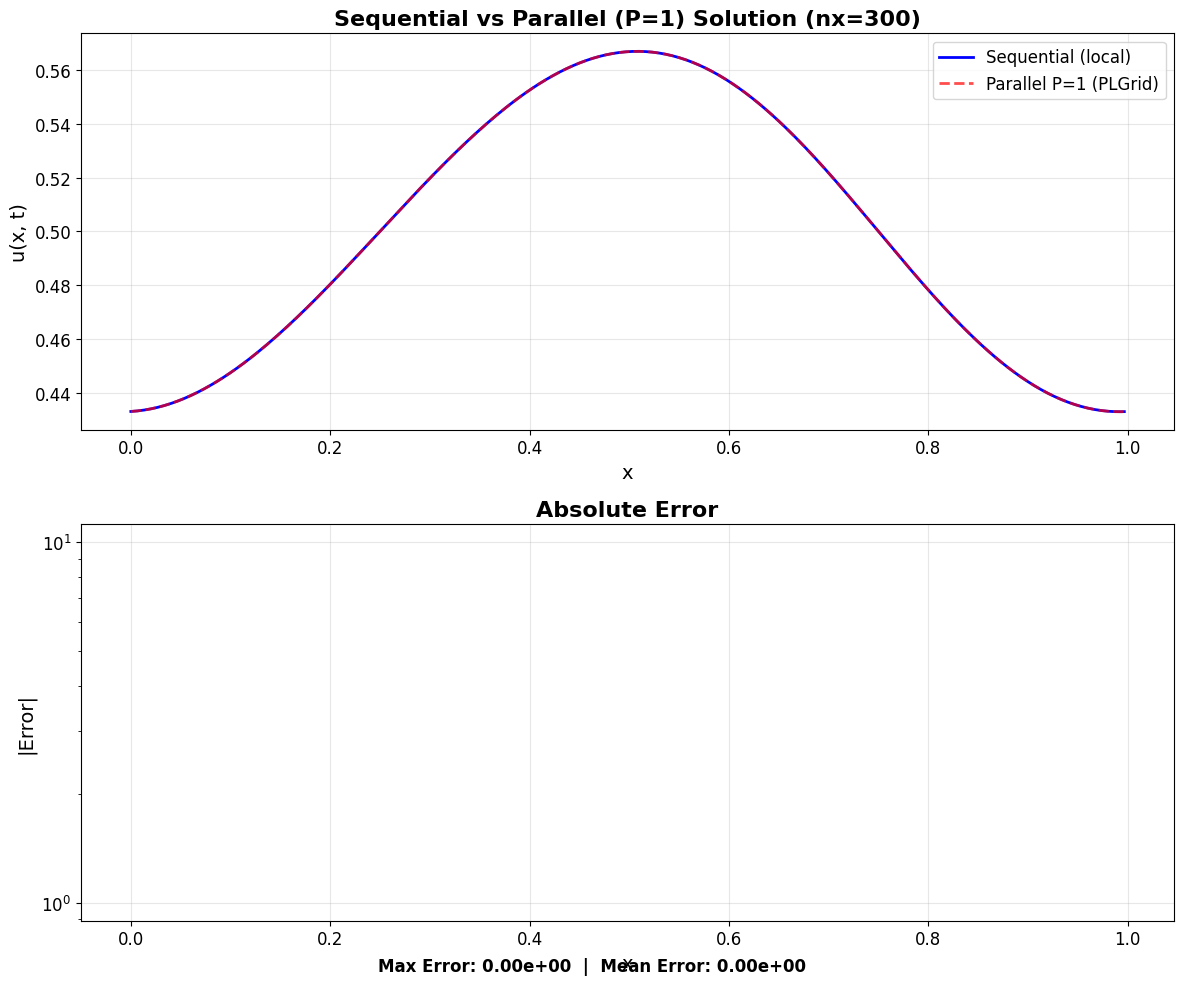


Verification:
  => Solutions are identical (within machine precision)


In [7]:
# Load parallel result with P=1 (should match sequential)
try:
    parallel_file = PARALLEL_DIR / f"burgers_nx{VISUALIZATION_SIZE}_P1.npz"
    
    if parallel_file.exists():
        par_data = np.load(parallel_file)
        
        x_par = par_data['x']
        u_par = par_data['u_final']
        
        # Interpolate if grids are different
        if len(x) != len(x_par):
            u_par_interp = np.interp(x, x_par, u_par)
        else:
            u_par_interp = u_par
        
        # Create comparison plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # Solution comparison
        ax1.plot(x, u_final, 'b-', linewidth=2, label='Sequential (local)')
        ax1.plot(x_par, u_par, 'r--', linewidth=2, label='Parallel P=1 (PLGrid)', alpha=0.7)
        ax1.set_xlabel('x', fontsize=14)
        ax1.set_ylabel('u(x, t)', fontsize=14)
        ax1.set_title(f'Sequential vs Parallel (P=1) Solution (nx={VISUALIZATION_SIZE})', 
                     fontsize=16, fontweight='bold')
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Error analysis
        error = np.abs(u_final - u_par_interp)
        ax2.plot(x, error, 'g-', linewidth=2)
        ax2.set_xlabel('x', fontsize=14)
        ax2.set_ylabel('|Error|', fontsize=14)
        ax2.set_title('Absolute Error', fontsize=16, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.set_yscale('log')
        
        # Statistics
        max_error = np.max(error)
        mean_error = np.mean(error)
        fig.text(0.5, 0.02,
                f'Max Error: {max_error:.2e}  |  Mean Error: {mean_error:.2e}',
                ha='center', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        output_file = PLOTS_DIR / f'comparison_seq_vs_par_nx{VISUALIZATION_SIZE}.png'
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Saved: {output_file}")
        plt.show()
        
        # Print verification
        print(f"\nVerification:")
        if max_error < 1e-10:
            print("  => Solutions are identical (within machine precision)")
        elif max_error < 1e-6:
            print("  => Solutions are very close (acceptable difference)")
        else:
            print("  => WARNING: Solutions differ significantly - check implementation!")
    else:
        print(f"Parallel result file not found: {parallel_file}")
        print("Skipping comparison.")
        
except Exception as e:
    print(f"Error loading parallel results: {e}")
    print("Skipping comparison.")

## Summary

This notebook provides comprehensive visualization tools for:
- Understanding solution evolution
- Detecting shock wave formation
- Validating numerical methods
- Comparing different solver implementations

**Next Steps:**
- Run performance analysis with `4_performance_analysis.ipynb`
- Test different initial conditions
- Vary viscosity to see effects on shock formation